# Dimension reduction in Python

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Principal Component Analysis (PCA)

### Introduction

Principal Component Analysis (PCA) is a **linear dimensionality reduction** technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.

Dimensions are nothing but features that represent the data. For example, A 28 X 28 image has 784 picture elements (pixels) that are the dimensions or features which together represent that image.

One important thing to note about PCA is that it is an **Unsupervised** dimensionality reduction technique, you can cluster the similar data points based on the feature correlation between them without any supervision (or labels), and you will learn how to achieve this practically using Python in later sections of this tutorial!

According to *Wikipedia*, PCA is a **statistical** procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components.

**Note**: Features, Dimensions, and Variables are all referring to the same thing. You will find them being used interchangeably.

#### But where can you apply PCA?

- **Data Visualization**: When working on any data related problem, the challenge in today's world is the sheer volume of data, and the variables/features that define that data. To solve a problem where data is the key, you need extensive data exploration like finding out how the variables are correlated or understanding the distribution of a few variables. Considering that there are a large number of variables or dimensions along which the data is distributed, visualization can be a challenge and almost impossible.

    Hence, PCA can do that for you since it projects the data into a lower dimension, thereby allowing you to visualize the data in a 2D or 3D space with a naked eye.

- **Speeding Machine Learning (ML) Algorithm**: Since PCA's main idea is dimensionality reduction, you can leverage that to speed up your machine learning algorithm's training and testing time considering your data has a lot of features, and the ML algorithm's learning is too slow.

At an abstract level,  you take a dataset having many features, and you simplify that dataset by selecting a few ``Principal Components`` from original features.

#### What is a Principal Component?

Principal components are the key to PCA; they represent what's underneath the hood of your data. In a layman term, when the data is projected into a lower dimension (assume three dimensions) from a higher space, the three dimensions are nothing but the three Principal Components that captures (or holds) most of the variance (information) of your data.

Principal components have both direction and magnitude. The direction represents across which *principal axes* the data is mostly spread out or has most variance and the magnitude signifies the amount of variance that Principal Component captures of the data when projected onto that axis. The principal components are a straight line, and the first principal component holds the most variance in the data. Each subsequent principal component is orthogonal to the last and has a lesser variance. In this way, given a set of <i>x</i> correlated variables over <i>y</i> samples you achieve a set of <i>u</i> uncorrelated principal components over the same <i>y</i> samples.

The reason you achieve uncorrelated principal components from the original features is that the correlated features contribute to the same principal component, thereby reducing the original data features into uncorrelated principal components; each representing a different set of correlated features with different amounts of variation.

Each principal component represents a percentage of total variation captured from the data.

In today's tutorial, you will mainly apply PCA on the two use-cases:
- ``Data Visualization``
- ``Speeding ML algorithm``

To accomplish the above two tasks, you will use two famous Breast Cancer (numerical) and CIFAR - 10 (image) dataset.

## the Data: Breast Cancer

The Breast Cancer data set is a real-valued multivariate data that consists of two classes, where each class signifies whether a patient has breast cancer or not. The two categories are: malignant and benign.

The malignant class has 212 samples, whereas the benign class has 357 samples.

It has 30 features shared across all classes: radius, texture, perimeter, area, smoothness, fractal dimension, etc.

You can download the breast cancer dataset from <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">here</a>, or rather an easy way is by loading it with the help of the ``sklearn`` library.

In [2]:
# Load the data
from sklearn.datasets import load_breast_cancer

``load_breast_cancer`` will give you both labels and the data. To fetch the data, you will call ``.data`` and for fetching the labels ``.target``.

The data has 569 samples with thirty features, and each sample has a label associated with it. There are two labels in this dataset.

In [3]:
breast = load_breast_cancer()

features = breast.feature_names
breast_data = breast.data
breast_labels = breast.target
breast_data.shape, breast_labels.shape

((569, 30), (569,))

In [4]:
final_breast_data = np.concatenate([breast_data,breast_labels.reshape(-1,1)],axis=1)
breast_dataset = pd.DataFrame(final_breast_data)
breast_dataset.columns = np.append(breast.feature_names,'label')
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


Since the original labels are in 0,1 format, you will change the labels to benign and malignant using .replace function. You will use inplace=True which will modify the dataframe breast_dataset.

In [5]:
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


### Data Visualization using PCA

Now comes the most exciting part of this tutorial. As you learned earlier that PCA projects turn high-dimensional data into a low-dimensional principal component, now is the time to visualize that with the help of Python!

- You start by <b>``Standardizing``</b> the data since PCA's output is influenced based on the scale of the features of the data.
- It is a common practice to normalize your data before feeding it to any machine learning algorithm.

- To apply normalization, you will import ``StandardScaler`` module from the sklearn library and select only the features from the ``breast_dataset`` you created in the Data Exploration step. Once you have the features, you will then apply scaling by doing ``fit_transform`` on the feature data.

- While applying StandardScaler, each feature of your data should be normally distributed such that it will scale the distribution to a mean of zero and a standard deviation of one.

In [6]:
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features

Let's check whether the normalized data has a mean of zero and a standard deviation of one.

In [7]:
np.mean(x),np.std(x)

(-6.826538293184326e-17, 1.0)

Let's convert the normalized features into a tabular format with the help of DataFrame.

In [8]:
normalised_breast = pd.DataFrame(x,columns=breast_dataset.columns[:-1])
normalised_breast.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


We now apply the PCA to these data using ``sklearn.decomposition.PCA``

In [9]:
pca = PCA()
x_pca = pca.fit_transform(x)

Some questions:
1. How many principal components do we have?
1. What is the main contribution to the first principal component
1. What is the explained variance of the first principal component

In [11]:
print("Number of principal components: {0:d}".format(len(pca.components_)))
print("Composition of the 1rst components: {0}".format([np.argmax(pca.components_[0])]))
print("Explained variance of the first principal component: {0}".format(pca.explained_variance_[0]))

Number of principal components: 30
Composition of the 1rst components: [7]
Explained variance of the first principal component: 13.304990794374534


4. If you want to reduce, the reduction dimension of your dataset. How many principal dimensions do you choose?

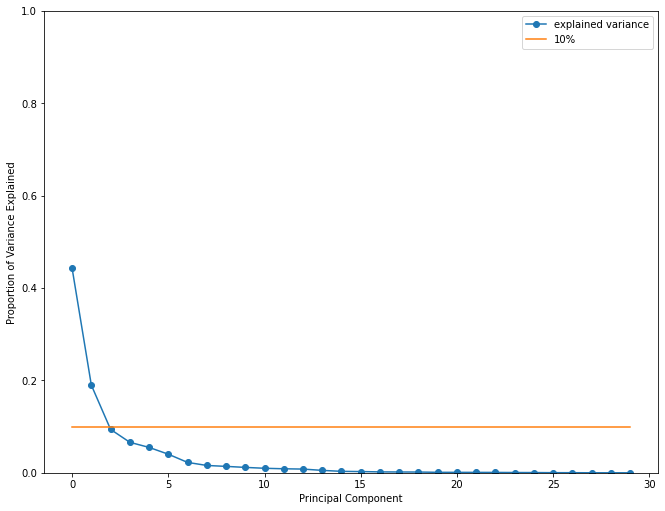

In [12]:
# Plot the explained variance by components --> Ratio criterion
plt.figure(figsize=(11,8.5))
plt.plot(pca.explained_variance_ratio_,"-o",label="explained variance")
plt.plot([0.1]*len(pca.components_), label="10%")
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Variance Explained")
plt.legend(loc="best")
plt.ylim(0,1)
plt.show()

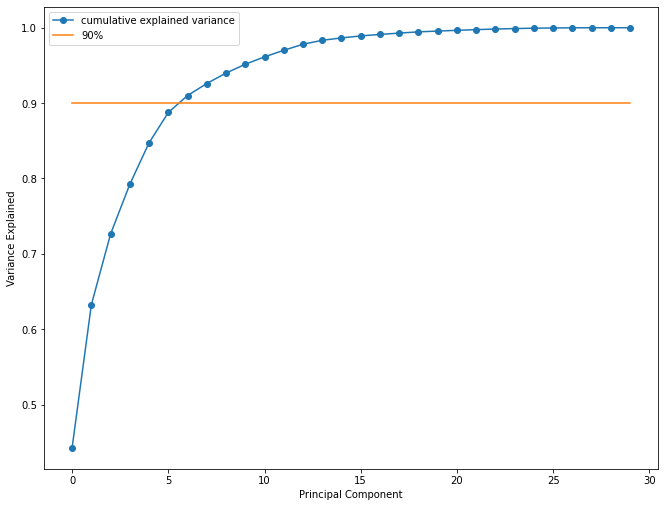

In [13]:
# Plot the cumulative explained variance --> Cumulative explained variance criterion
plt.figure(figsize=(11,8.5))
plt.plot(np.cumsum(pca.explained_variance_ratio_),"-o", label="cumulative explained variance")
plt.plot([0.9]*len(pca.components_), label="90%")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.legend(loc="best")
plt.show()

In [14]:
# Select the appropriate number of components --> Cumulative explained variance criterion
def choose_nb_components(pca, threshold):
    sum_expl_variance = 0
    for i, expl_variance in enumerate(pca.explained_variance_ratio_):
        sum_expl_variance += expl_variance
        if sum_expl_variance>threshold:
            return i+1
    return i+1
        
nb_components = choose_nb_components(pca, 0.9)
nb_components

7

By adopting the 90% rule we could keep only 7 main components

Now comes the critical part, the next few lines of code will be projecting the thirty-dimensional Breast Cancer data to two-dimensional <b>``principal components``</b>.

In [15]:
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

Next, let's create a DataFrame that will have the principal component values for all 569 samples.

In [16]:
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])
principal_breast_Df.tail()

,principal component 1,principal component 2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


- Once you have the principal components, you can find the <b>``explained_variance_ratio``</b>. It will provide you with the amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace.

In [17]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


From the above output, you can observe that the ``principal component 1`` holds 44.2% of the information while the ``principal component 2`` holds only 19% of the information. Also, the other point to note is that while projecting thirty-dimensional data to a two-dimensional data, 36.8% information was lost.

Let's plot the visualization of the 569 samples along the ``principal component - 1`` and ``principal component - 2`` axis. It should give you good insight into how your samples are distributed among the two classes.

<Figure size 432x288 with 0 Axes>

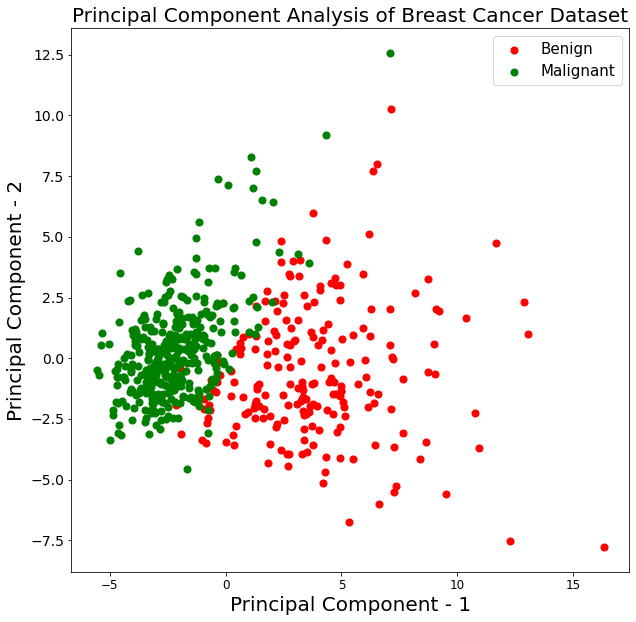

In [18]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15});

From the above graph, you can observe that the two classes ``benign`` and ``malignant``, when projected to a two-dimensional space, can be linearly separable up to some extent. Other observations can be that the ``benign`` class is spread out as compared to the ``malignant`` class.

### Data visualization using tSNE

Now you will do the same exercise using the t-SNE algorithm. Scikit-learn has an implementation of t-SNE available, and you can check its documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html). It provides a wide variety of tuning parameters for t-SNE, and the most notable ones are:
- **n_components** (default: 2): Dimension of the embedded space.
- **perplexity** (default: 30): The perplexity is related to the number of nearest neighbors that are used in other manifold learning algorithms. Consider selecting a value between 5 and 50.
- **early_exaggeration** (default: 12.0): Controls how tight natural clusters in the original space are in the embedded space and how much space will be between them.
- **learning_rate** (default: 200.0): The learning rate for t-SNE is usually in the range (10.0, 1000.0).
- **n_iter** (default: 1000): Maximum number of iterations for the optimization. Should be at least 250.
- **method** (default: ‘barnes_hut’): Barnes-Hut approximation runs in O(NlogN) time. method=’exact’ will run on the slower, but exact, algorithm in O(N^2) time.

Be careful: t-SNE takes much longer to run on the same data sample size than PCA.

In [19]:
tsne = TSNE(n_components=2)
tsne_breast = tsne.fit_transform(x)

In [20]:
tsne_breast_Df = pd.DataFrame(data = tsne_breast
             , columns = ['axis 1', 'axis 2'])
tsne_breast_Df.tail()

,axis 1,axis 2
564,-29.058441,-16.665115
565,-27.908621,-5.697859
566,-13.683406,-1.882901
567,-30.182039,-13.918608
568,19.691984,22.258875


<Figure size 432x288 with 0 Axes>

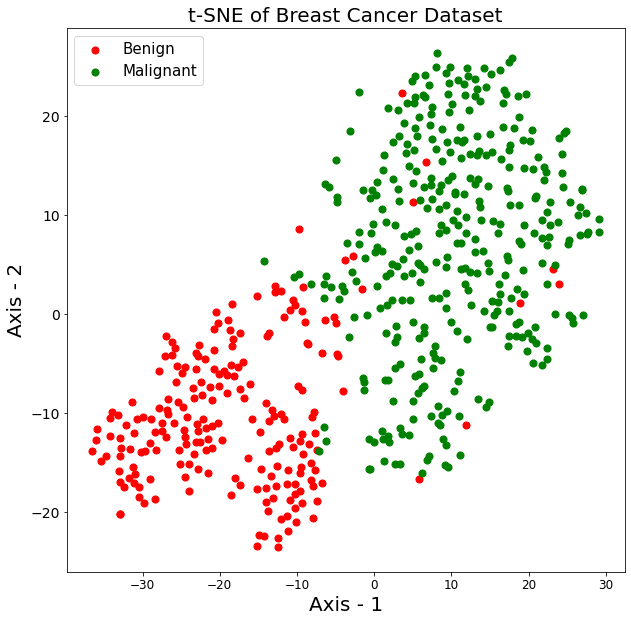

In [21]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Axis - 1',fontsize=20)
plt.ylabel('Axis - 2',fontsize=20)
plt.title("t-SNE of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(tsne_breast_Df.loc[indicesToKeep, 'axis 1']
               , tsne_breast_Df.loc[indicesToKeep, 'axis 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15});

### Visualizing data with LDA

Now try to do the same exercise using the LDA algorithm. Scikit-learn has an implementation of LDA which you can consult the documentation [here] (https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html).

Remember that LDA is a supervised projection.

If you have an error, it is normal. Why is this?

hit : look at the description of the n_components parameter